Aniket Chavan

9420395075
aniketc7303@gmail.com

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#https://drive.google.com/file/d/1yv5FoCZGDx8LCo-ZxjAqfUyX2rakzvYQ/view?usp=sharing - List of Orders
#https://drive.google.com/file/d/1VXZMZ4Ii9AMnbJEZcJmKtRuD6NQ_PA_7/view?usp=sharing - Order Details
#https://drive.google.com/file/d/1o4aGwi5Cv91kp2a6Z-Vp7ARTw2Vfs0Np/view?usp=sharing - Sales Target

In [ ]:
!gdown 1yv5FoCZGDx8LCo-ZxjAqfUyX2rakzvYQ

Downloading...
From: https://drive.google.com/uc?id=1yv5FoCZGDx8LCo-ZxjAqfUyX2rakzvYQ
To: /content/List_of_Orders_55FFC79CF8.csv
100% 23.6k/23.6k [00:00<00:00, 38.5MB/s]


In [ ]:
!gdown 1VXZMZ4Ii9AMnbJEZcJmKtRuD6NQ_PA_7

Downloading...
From: https://drive.google.com/uc?id=1VXZMZ4Ii9AMnbJEZcJmKtRuD6NQ_PA_7
To: /content/Order_Details_19795F61CF.csv
100% 63.6k/63.6k [00:00<00:00, 51.9MB/s]


In [ ]:
!gdown 1o4aGwi5Cv91kp2a6Z-Vp7ARTw2Vfs0Np

Downloading...
From: https://drive.google.com/uc?id=1o4aGwi5Cv91kp2a6Z-Vp7ARTw2Vfs0Np
To: /content/Sales_target_DD2E9B96A0.csv
100% 1.01k/1.01k [00:00<00:00, 3.48MB/s]


In [ ]:
#viewing datasets
df_order = pd.read_csv('List_of_Orders_55FFC79CF8.csv')
df_orderDeatils = pd.read_csv('Order_Details_19795F61CF.csv')
print(f"Orders Dataset : \n{df_order.head()}\n")
print(f"Order Details Dataset : \n{df_orderDeatils.head()}\n")

Orders Dataset : 
  Order ID  Order Date CustomerName           State       City
0  B-25601  01-04-2018       Bharat         Gujarat  Ahmedabad
1  B-25602  01-04-2018        Pearl     Maharashtra       Pune
2  B-25603  03-04-2018        Jahan  Madhya Pradesh     Bhopal
3  B-25604  03-04-2018       Divsha       Rajasthan     Jaipur
4  B-25605  05-04-2018      Kasheen     West Bengal    Kolkata

Order Details Dataset : 
  Order ID  Amount  Profit  Quantity     Category      Sub-Category
0  B-25601  1275.0 -1148.0         7    Furniture         Bookcases
1  B-25601    66.0   -12.0         5     Clothing             Stole
2  B-25601     8.0    -2.0         3     Clothing       Hankerchief
3  B-25601    80.0   -56.0         4  Electronics  Electronic Games
4  B-25602   168.0  -111.0         2  Electronics            Phones



In [ ]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Order ID      500 non-null    object
 1   Order Date    500 non-null    object
 2   CustomerName  500 non-null    object
 3   State         500 non-null    object
 4   City          500 non-null    object
dtypes: object(5)
memory usage: 22.0+ KB


In [ ]:
df_order.isna().sum()

,0
Order ID,60
Order Date,60
CustomerName,60
State,60
City,60


In [ ]:
null_rows = df_order[df_order.isnull().any(axis=1)]
print(null_rows)

    Order ID Order Date CustomerName State City
500      NaN        NaN          NaN   NaN  NaN
501      NaN        NaN          NaN   NaN  NaN
502      NaN        NaN          NaN   NaN  NaN
503      NaN        NaN          NaN   NaN  NaN
504      NaN        NaN          NaN   NaN  NaN
505      NaN        NaN          NaN   NaN  NaN
506      NaN        NaN          NaN   NaN  NaN
507      NaN        NaN          NaN   NaN  NaN
508      NaN        NaN          NaN   NaN  NaN
509      NaN        NaN          NaN   NaN  NaN
510      NaN        NaN          NaN   NaN  NaN
511      NaN        NaN          NaN   NaN  NaN
512      NaN        NaN          NaN   NaN  NaN
513      NaN        NaN          NaN   NaN  NaN
514      NaN        NaN          NaN   NaN  NaN
515      NaN        NaN          NaN   NaN  NaN
516      NaN        NaN          NaN   NaN  NaN
517      NaN        NaN          NaN   NaN  NaN
518      NaN        NaN          NaN   NaN  NaN
519      NaN        NaN          NaN   N

In [ ]:
#droping the null values
df_order = df_order.dropna()
len(df_order)

500

In [ ]:
df_orderDeatils.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      1500 non-null   object 
 1   Amount        1500 non-null   float64
 2   Profit        1500 non-null   float64
 3   Quantity      1500 non-null   int64  
 4   Category      1500 non-null   object 
 5   Sub-Category  1500 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 70.4+ KB


In [ ]:
df_orderDeatils.isna().sum()

,0
Order ID,0
Amount,0
Profit,0
Quantity,0
Category,0
Sub-Category,0


In [ ]:
#Merging the datasets
combined_data = pd.merge(df_order, df_orderDeatils, on = 'Order ID', how = 'inner')
combined_data.head()

,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief
3,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,80.0,-56.0,4,Electronics,Electronic Games
4,B-25602,01-04-2018,Pearl,Maharashtra,Pune,168.0,-111.0,2,Electronics,Phones


In [ ]:
combined_data.shape

(1500, 10)

##**Sales Analysis:**

###**Part 1: Sales and Profitability Analysis**

In [ ]:
#Total sales (Amount) for each category
categorywise_sales = combined_data.groupby('Category')['Amount'].sum().reset_index()
print(categorywise_sales)

      Category    Amount
0     Clothing  139054.0
1  Electronics  165267.0
2    Furniture  127181.0


In [ ]:
#For each category, average profit per order and total profit margin(profit as a percentage of Amount)
categorywise_data = combined_data.groupby('Category').agg(
    Toal_Sales =('Amount', 'sum'),
    Toal_Profit =('Profit', 'sum'),
    Avg_Profit =('Profit', 'mean')
    ).reset_index()
categorywise_data

,Category,Toal_Sales,Toal_Profit,Avg_Profit
0,Clothing,139054.0,11163.0,11.762908
1,Electronics,165267.0,10494.0,34.071429
2,Furniture,127181.0,2298.0,9.456790


In [ ]:
#Profit margin
categorywise_data['Profit_Margin'] = categorywise_data['Toal_Profit']/categorywise_data['Toal_Sales'] * 100
categorywise_data

,Category,Toal_Sales,Toal_Profit,Avg_Profit,Profit_Margin
0,Clothing,139054.0,11163.0,11.762908,8.027817
1,Electronics,165267.0,10494.0,34.071429,6.349725
2,Furniture,127181.0,2298.0,9.456790,1.806874


In [ ]:
#top-performing and underperforming categories
top_category = categorywise_data.loc[categorywise_data['Avg_Profit'].idxmax()]
bottom_category = categorywise_data.loc[categorywise_data['Avg_Profit'].idxmin()]
print(f"Top Performing Category : \n{top_category}\n")
print(f"Under Performing Category : \n{bottom_category}\n")

Top Performing Category : 
Category         Electronics
Toal_Sales          165267.0
Toal_Profit          10494.0
Avg_Profit         34.071429
Profit_Margin       6.349725
Name: 1, dtype: object

Under Performing Category : 
Category         Furniture
Toal_Sales        127181.0
Toal_Profit         2298.0
Avg_Profit         9.45679
Profit_Margin     1.806874
Name: 2, dtype: object



###**Part 2: Target Achievement Analysis**

In [ ]:
target_sales = pd.read_csv('Sales_target_DD2E9B96A0.csv')
target_sales.head()

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0
3,Jul-18,Furniture,10800.0
4,Aug-18,Furniture,10900.0


In [ ]:
#Percentage change in target sales for the Furniture category month-over-month
furniture_cat = target_sales[target_sales['Category'] == 'Furniture']
furniture_cat['percentage_monthly_change'] = furniture_cat['Target'].pct_change()*100
furniture_cat[['Month of Order Date', 'Target', 'percentage_monthly_change']]

,Month of Order Date,Target,percentage_monthly_change
0,Apr-18,10400.0,NaN
1,May-18,10500.0,0.961538
2,Jun-18,10600.0,0.952381
3,Jul-18,10800.0,1.886792
4,Aug-18,10900.0,0.925926
5,Sep-18,11000.0,0.917431
6,Oct-18,11100.0,0.909091
7,Nov-18,11300.0,1.801802
8,Dec-18,11400.0,0.884956
9,Jan-19,11500.0,0.877193


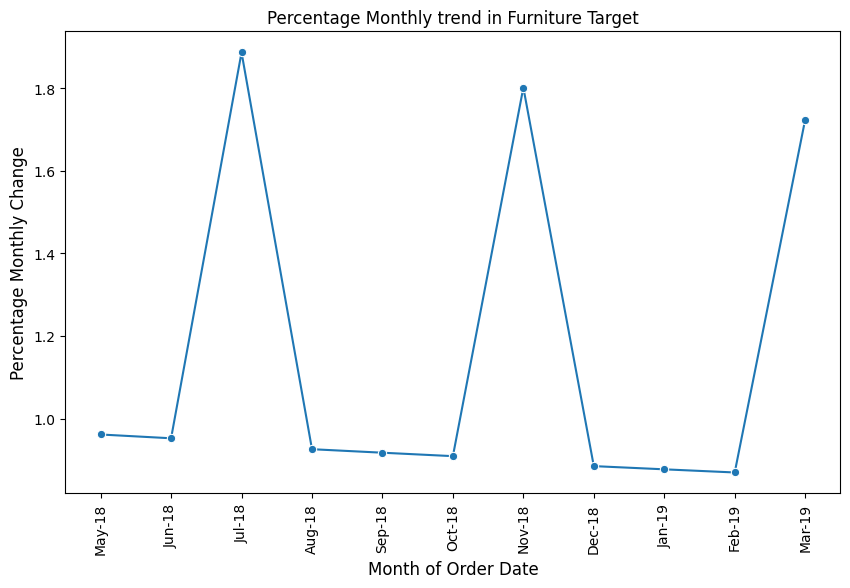

In [ ]:
#Analysing the trend
plt.figure(figsize=(10,6))
sns.lineplot(x= 'Month of Order Date', y = 'percentage_monthly_change', data = furniture_cat, marker='o')
plt.title('Percentage Monthly trend in Furniture Target')
plt.xlabel('Month of Order Date', fontsize = 12)
plt.ylabel('Percentage Monthly Change', fontsize = 12)
plt.xticks(rotation = 90)
plt.show()

###**Part 3: Regional Performance Insights**

In [ ]:
#Top 5 states with the highest orders
state_order_counts = combined_data['State'].value_counts().reset_index()
state_order_counts.columns = ['State', 'Order Count']
top5_states = state_order_counts.head(5)
print(top5_states)

            State  Order Count
0  Madhya Pradesh          340
1     Maharashtra          290
2         Gujarat           87
3           Delhi           74
4       Rajasthan           74


In [ ]:
#Total sales and average profit for these states
top_states = combined_data[combined_data['State'].isin(top5_states['State'])]

state_data = top_states.groupby('State').agg(
    total_sales=('Amount', 'sum'),
    avg_profit=('Profit', 'mean')
).reset_index()

state_data

,State,total_sales,avg_profit
0,Delhi,22531.0,40.364865
1,Gujarat,21058.0,5.344828
2,Madhya Pradesh,105140.0,16.326471
3,Maharashtra,95348.0,21.296552
4,Rajasthan,21149.0,16.986486


In [ ]:
#Regional disparities in sales or profitability
regionwise_performance = combined_data.groupby('State').agg(
    Total_sales=('Amount', 'sum'),
    Avg_profit=('Profit', 'mean')).reset_index()

regionwise_performance

,State,Total_sales,Avg_profit
0,Andhra Pradesh,13256.0,-11.809524
1,Bihar,12943.0,-5.177419
2,Delhi,22531.0,40.364865
3,Goa,6705.0,8.604651
4,Gujarat,21058.0,5.344828
5,Haryana,8863.0,50.961538
6,Himachal Pradesh,8666.0,22.620690
7,Jammu and Kashmir,10829.0,0.163265
8,Karnataka,15058.0,11.944444
9,Kerala,13459.0,41.577778


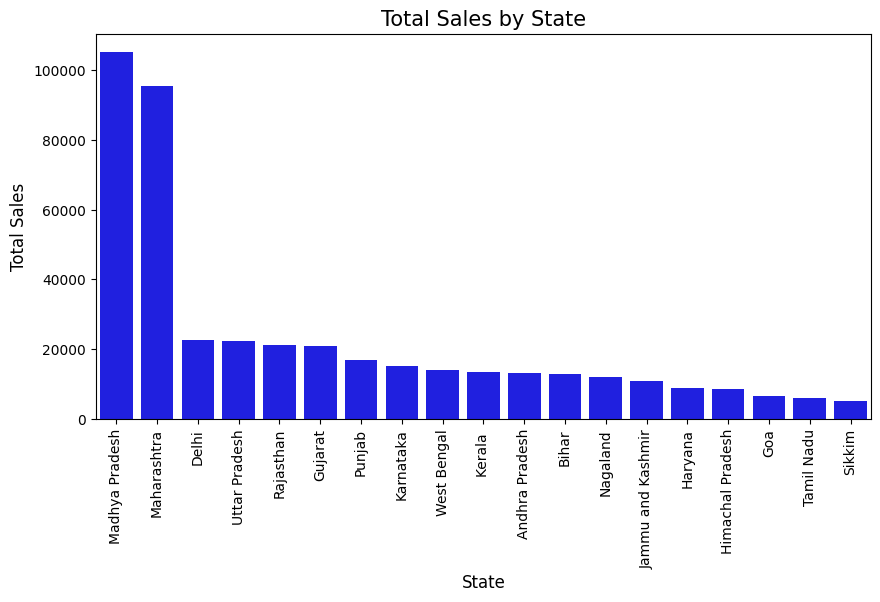

In [ ]:
#Disparities in sales Bar Chart
regionwise_performance = regionwise_performance.sort_values(by='Total_sales', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='State', y='Total_sales', data=regionwise_performance, color ='Blue')
plt.title("Total Sales by State", fontsize=15)
plt.xlabel("State", fontsize=12)
plt.ylabel("Total Sales", fontsize=12)
plt.xticks(rotation=90)
plt.show()

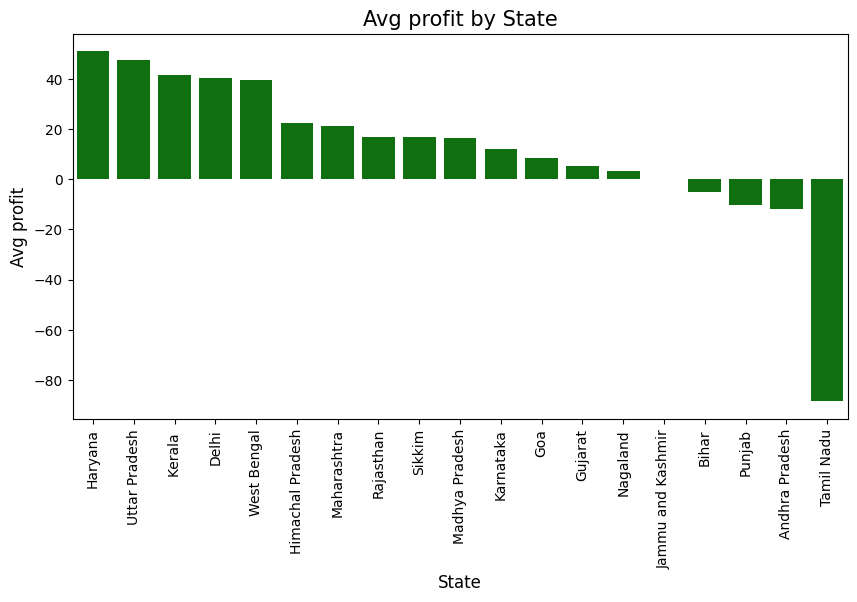

In [ ]:
#Disparities in profitability
regionwise_performance = regionwise_performance.sort_values(by='Avg_profit', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='State', y='Avg_profit', data=regionwise_performance, color ='green')
plt.title("Avg profit by State", fontsize=15)
plt.xlabel("State", fontsize=12)
plt.ylabel("Avg profit", fontsize=12)
plt.xticks(rotation=90)
plt.show()

##**App Exploration:**

####**Effective and user-friendly things**

1.   Very **easy enrollment** to the app. No extra information required while app signing up. That is most effective & impressive thing i found while using app.
2.   While **verification** there is requirement of PAN number. In my case, it already had my document & that is **exciting**. But at the same time it is shocking too seeing that without any document entry it already fetched our document.
3. **Loan procedure** given here is much **easier** than any other loan application & that is satisfying.
4. **Genuine refferals** gives confidence on the app investments.
5. **Current gold prices boost excitement** in envesting money.
6. It has **automated savings** option which reduces fatigue of uninterepted investment task.
7. Overall the user experience of the application is **easy to use**.



####**Areas of improvements**

1.  There is a **need to add introductory info** in the initial stages about the app i.e. how app works, how investment works and how the money will be safer with application.
2.  Need to **fix the UI/UX** of the application as it gives wibes of fake side sometimes. It may rise question on application working capacity & capabilities. It raise question on legality. Can sometime raise doubt in mind. It will **help new customers to build their trust**.
3. There is **support option** in the transation which is **not visible** to users. It shows customer's feedback on the application. This option should be on the front page. It will help to increase reduce trust issues.
4. Company should add easy option for withdrawal of money.
5. There is requirement of transfer money option from gold to silver & vice versa.

##**Product Exploration:**

1.   If there are **some offers on the loan** then it will be beneficial for both customer & company. It will **help company to increase there user base** by attracking more customers towards application. Customers also will get benifits from it.
2.   Application should **work on there offerings** such as daily useful items, clothing etc. It will improve there user base and will help in company's growth.
3.   When we click on the Nek, there are the options to purchase jewellery items. It shows a tag of 100% Certified. There is **need to add a ceritification** too to that jewellery. It will give more confidence on that perticular product.
4.   There is **glitch** in application while withdrawing money from it. Need to connect to customer support. Need to improve this.
5.   It should **change valuation** of customer investments **live**. It will will help customers boost their confidence.
6.   Need to **focus on customer support** team. As it has very bad replies.
7.   If application shows how they **charge taxes** & application charges to customer it will build trust.
8.   Also company can offer **term insurance** coverings to customer's investments.

